# imports

In [2]:
import datetime
import importlib
import pandas as pd, numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy_ext import rolling_apply as rolling_apply_ext
import talib
from talib import MA_Type
import numpy.linalg

In [3]:
import algo.data.read

In [4]:
df_binance_20230904_05 =  algo.data.read.df_binance_202309[(algo.data.read.df_binance_202309.index >= "2023-09-04 00:00:00") & (algo.data.read.df_binance_202309.index < "2023-09-06 00:00:00")]

In [5]:
#df = algo.data.read.df_binance_202309.copy()
df = df_binance_20230904_05
df_epoch = df.reset_index()
df_epoch['time'] = df_epoch['time'].astype(np.int64) // 10**9
df_epoch = df_epoch.rename(columns={'time': 'timestamp'}) 
df_epoch = df_epoch.set_index('timestamp')

In [6]:
df_epoch.to_csv('algo/data/binance/df_binance_20230904_05.csv')

In [7]:
df_epoch

symbol,1INCHBUSD,1INCHUSDT,AAVEBUSD,AAVEUSDT,ACABUSD,ACAUSDT,ACHBUSD,ACHUSDT,ACMUSDT,ADABUSD,...,YFIBUSD,YFIUSDT,YGGBUSD,YGGUSDT,ZECBUSD,ZECUSDT,ZENUSDT,ZILBUSD,ZILUSDT,ZRXUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
1693785600,0.2349,0.2346,54.87,54.77,0.0429,0.0427,0.01298,0.01301,1.887,0.2559,...,5395.0,5410.0,0.2235,0.2236,24.78,24.76,7.27,0.01612,0.01610,0.1647
1693785660,0.2349,0.2348,54.87,54.79,0.0429,0.0428,0.01298,0.01301,1.891,0.2561,...,5395.0,5410.0,0.2235,0.2232,24.78,24.75,7.27,0.01612,0.01611,0.1647
1693785720,0.2349,0.2349,54.87,54.80,0.0429,0.0428,0.01298,0.01302,1.891,0.2561,...,5395.0,5412.0,0.2232,0.2231,24.75,24.76,7.27,0.01612,0.01612,0.1647
1693785780,0.2349,0.2349,54.87,54.81,0.0429,0.0428,0.01298,0.01302,1.891,0.2561,...,5395.0,5416.0,0.2232,0.2233,24.75,24.74,7.27,0.01612,0.01613,0.1647
1693785840,0.2349,0.2350,54.87,54.80,0.0429,0.0428,0.01298,0.01302,1.891,0.2562,...,5395.0,5416.0,0.2232,0.2233,24.75,24.74,7.27,0.01612,0.01613,0.1647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693958100,0.2444,0.2442,55.50,55.51,0.0424,0.0424,0.01316,0.01319,1.903,0.2577,...,5428.0,5429.0,0.2238,0.2246,24.62,24.64,7.31,0.01647,0.01646,0.1778
1693958160,0.2444,0.2443,55.50,55.49,0.0424,0.0424,0.01316,0.01319,1.903,0.2577,...,5428.0,5427.0,0.2238,0.2244,24.62,24.64,7.30,0.01647,0.01647,0.1778
1693958220,0.2444,0.2443,55.50,55.50,0.0424,0.0424,0.01316,0.01317,1.903,0.2577,...,5428.0,5427.0,0.2238,0.2246,24.62,24.64,7.30,0.01647,0.01646,0.1778


In [8]:
df_epoch.columns

Index(['1INCHBUSD', '1INCHUSDT', 'AAVEBUSD', 'AAVEUSDT', 'ACABUSD', 'ACAUSDT',
       'ACHBUSD', 'ACHUSDT', 'ACMUSDT', 'ADABUSD',
       ...
       'YFIBUSD', 'YFIUSDT', 'YGGBUSD', 'YGGUSDT', 'ZECBUSD', 'ZECUSDT',
       'ZENUSDT', 'ZILBUSD', 'ZILUSDT', 'ZRXUSDT'],
      dtype='object', name='symbol', length=614)

In [9]:
algo.data.read.df_binance_202309.resample('10min').last().dropna().corr()

symbol,1INCHBUSD,1INCHUSDT,AAVEBUSD,AAVEUSDT,ACABUSD,ACAUSDT,ACHBUSD,ACHUSDT,ACMUSDT,ADABUSD,...,YFIBUSD,YFIUSDT,YGGBUSD,YGGUSDT,ZECBUSD,ZECUSDT,ZENUSDT,ZILBUSD,ZILUSDT,ZRXUSDT
symbol,,,,,,,,,,,,,,,,,,,,,
1INCHBUSD,1.000000,0.997505,0.739102,0.747099,0.361370,0.362615,0.819186,0.827050,-0.450674,0.519208,...,-0.088715,-0.096456,-0.055080,-0.054243,0.678007,0.689126,0.266915,0.884211,0.889908,0.785350
1INCHUSDT,0.997505,1.000000,0.740434,0.749659,0.363035,0.364294,0.822250,0.831141,-0.451785,0.520860,...,-0.089869,-0.094641,-0.054449,-0.053326,0.678961,0.691481,0.269298,0.884598,0.892141,0.785671
AAVEBUSD,0.739102,0.740434,1.000000,0.993948,0.574879,0.573982,0.729800,0.735490,-0.151144,0.641171,...,0.171156,0.181693,-0.140492,-0.140305,0.696405,0.701236,0.199581,0.842928,0.841132,0.600947
AAVEUSDT,0.747099,0.749659,0.993948,1.000000,0.580467,0.580048,0.738024,0.745187,-0.159265,0.640384,...,0.167680,0.180555,-0.141307,-0.140690,0.699813,0.707277,0.197252,0.845575,0.846309,0.605890
ACABUSD,0.361370,0.363035,0.574879,0.580467,1.000000,0.998065,0.498043,0.499117,-0.185104,0.110230,...,-0.017399,-0.014858,-0.353152,-0.353168,0.571873,0.575629,-0.148498,0.522010,0.522710,0.234087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZECUSDT,0.689126,0.691481,0.701236,0.707277,0.575629,0.575707,0.664518,0.668774,-0.385685,0.438630,...,0.005271,-0.003715,-0.318480,-0.319188,0.992180,1.000000,0.056565,0.793247,0.797359,0.555926
ZENUSDT,0.266915,0.269298,0.199581,0.197252,-0.148498,-0.148290,0.450291,0.449458,0.424221,0.334600,...,0.510965,0.511955,0.800874,0.799108,0.061159,0.056565,1.000000,0.168078,0.172559,-0.100606
ZILBUSD,0.884211,0.884598,0.842928,0.845575,0.522010,0.519353,0.772939,0.778373,-0.451652,0.628006,...,-0.096035,-0.094228,-0.247679,-0.248092,0.787573,0.793247,0.168078,1.000000,0.993997,0.800273


In [10]:
symbols_pool = [s for _, s in sorted([(m, s) for s, m in algo.data.read.df_binance_202309.mean().items() if m > 10 and m < 500], reverse=True)]
# remove duplicates within USDT / BUSD swap
symbols_pool = [s for s in symbols_pool if s not in [s.replace('USDT', 'BUSD') for s in symbols_pool if 'USDT' in s]]
symbols_pool

['BIFIUSDT',
 'BNBUSDT',
 'BCHUSDT',
 'XMRUSDT',
 'GNOUSDT',
 'QNTUSDT',
 'LTCUSDT',
 'AAVEUSDT',
 'KP3RUSDT',
 'ILVUSDT',
 'COMPUSDT',
 'GMXUSDT',
 'TRBUSDT',
 'WNXMUSDT',
 'DASHUSDT',
 'ZECUSDT',
 'EGLDUSDT',
 'RPLUSDT',
 'FARMUSDT',
 'BNBUPUSDT',
 'SOLUSDT',
 'KSMUSDT',
 'SSVUSDT',
 'ETCUSDT',
 'MLNUSDT',
 'NMRUSDT',
 'DCRUSDT',
 'CREAMBUSD',
 'ALCXUSDT']

In [11]:
set_size, set_num = 2, 6
symbols_sets = algo.data.read.get_high_corr_symbols_set_of(algo.data.read.df_binance_202308, 10, set_size, set_num, symbols_pool, high_corr=True)
symbols_sets

start_symbol: FARMUSDT
(0.9853091961277229, 'FARMUSDT', 'COMPUSDT')
start_symbol: ZECUSDT
(0.9821116700462315, 'ZECUSDT', 'LTCUSDT')
start_symbol: BNBUPUSDT
(0.981275983108528, 'BNBUPUSDT', 'BNBUSDT')
start_symbol: SSVUSDT
(0.9804022282607159, 'SSVUSDT', 'KP3RUSDT')
start_symbol: SOLUSDT
(0.9798867228498191, 'SOLUSDT', 'ILVUSDT')
start_symbol: DASHUSDT
(0.9720447363256844, 'DASHUSDT', 'BIFIUSDT')


[['FARMUSDT', 'COMPUSDT'],
 ['ZECUSDT', 'LTCUSDT'],
 ['BNBUPUSDT', 'BNBUSDT'],
 ['SSVUSDT', 'KP3RUSDT'],
 ['SOLUSDT', 'ILVUSDT'],
 ['DASHUSDT', 'BIFIUSDT']]

In [12]:
set_size, set_num = 2, 6
symbols_sets_low_corr = algo.data.read.get_high_corr_symbols_set_of(algo.data.read.df_binance_202308, 10, set_size, set_num, symbols_pool, high_corr=False)
symbols_sets_low_corr

start_symbol: EGLDUSDT
(0.005776412349793026, 'EGLDUSDT', 'QNTUSDT')
start_symbol: RPLUSDT
(0.038605806813175034, 'RPLUSDT', 'TRBUSDT')
start_symbol: CREAMBUSD
(0.7847216100092885, 'CREAMBUSD', 'WNXMUSDT')
start_symbol: DCRUSDT
(0.7866866013569517, 'DCRUSDT', 'KSMUSDT')
start_symbol: ETCUSDT
(0.8245124827124991, 'ETCUSDT', 'XMRUSDT')
start_symbol: BCHUSDT
(0.8533584437153164, 'BCHUSDT', 'BIFIUSDT')


[['EGLDUSDT', 'QNTUSDT'],
 ['RPLUSDT', 'TRBUSDT'],
 ['CREAMBUSD', 'WNXMUSDT'],
 ['DCRUSDT', 'KSMUSDT'],
 ['ETCUSDT', 'XMRUSDT'],
 ['BCHUSDT', 'BIFIUSDT']]

In [13]:
#symbols = ['YFIIUSDT', 'ETHUSDT', 'PAXGUSDT', 'BIFIUSDT', 'BNBUSDT']
#symbols = ['YFIIUSDT', 'ETHUSDT', 'BIFIUSDT']
symbols = ['BNBUPUSDT', 'BNBUSDT', 'SOLUSDT']

In [14]:
df = algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 5, symbols, date_str_20230806, date_str_20230809).dropna()
(df / df.iloc[0])

NameError: name 'date_str_20230806' is not defined

In [864]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols, date_str_20230806, date_str_20230809).corr().style.background_gradient(cmap='coolwarm')

symbol,BNBUPUSDT,BNBUSDT,SOLUSDT
symbol,,,
BNBUPUSDT,1.000000,0.896701,0.655109
BNBUSDT,0.896701,1.000000,0.721838
SOLUSDT,0.655109,0.721838,1.000000


In [865]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols_sets_low_corr[0], date_str_20230806, date_str_20230831).corr().style.background_gradient(cmap='coolwarm')

symbol,EGLDUSDT,QNTUSDT
symbol,,
EGLDUSDT,1.000000,0.007205
QNTUSDT,0.007205,1.000000


In [866]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols_sets_low_corr[1], date_str_20230806, date_str_20230831).corr().style.background_gradient(cmap='coolwarm')

symbol,TRBUSDT,RPLUSDT
symbol,,
TRBUSDT,1.000000,-0.024562
RPLUSDT,-0.024562,1.000000


# Trading calculations

In [61]:
import algo.mean_reversion.predictability
importlib.reload(algo.mean_reversion.predictability)

import algo.statarbitrage.bband
importlib.reload(algo.statarbitrage.bband)

import algo.research.simulation
importlib.reload(algo.research.simulation)

import algo.mean_reversion.crossing_stat
importlib.reload(algo.mean_reversion.crossing_stat)

import algo.mean_reversion.combination
importlib.reload(algo.mean_reversion.combination)

import algo.trading.trade
importlib.reload(algo.trading.trade)

import algo.mean_reversion.optimization
importlib.reload(algo.mean_reversion.optimization)

<module 'algo.mean_reversion.optimization' from '/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py'>

In [79]:
def visuialize_symbols_sets(symbols_sets, stat_arbitrage_trading_param, mean_reversal_mode):
    for symbols in symbols_sets:
        print(f'symbols: {symbols}')
        values_list = algo.research.simulation.get_trading_result(algo.data.read.df_binance_202309, symbols, stat_arbitrage_trading_param, mean_reversal_mode)
        values_concat = pd.concat(values_list)
        print(len(values_concat[values_concat.position_changed == 1].dropna()))
        ax = values_concat.profit_raw.cumsum().plot(figsize=(12, 1))
        ymin, ymax = 0, values_concat.profit_raw.cumsum().max()
    
        #ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')
        #ax.vlines(x=list(values_concat[values_concat.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
        #ax.vlines(x=list(values_concat[values_concat.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')
    
        plt.show()

        ax2 = values_concat.mean_size.plot(figsize=(12, 1))
    
        plt.show()



# Rolling-based Portfolio Construction (minimal predictability)

symbols: ['FARMUSDT', 'COMPUSDT']
37


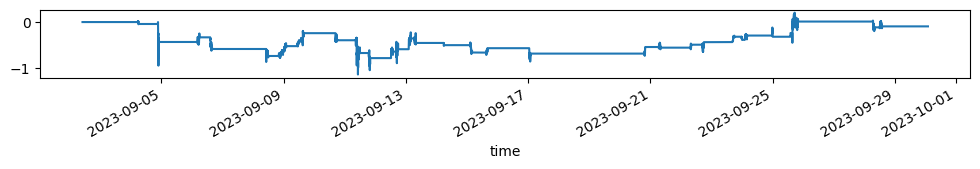

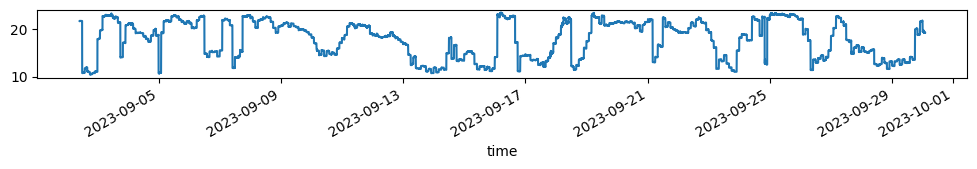

symbols: ['ZECUSDT', 'LTCUSDT']
31


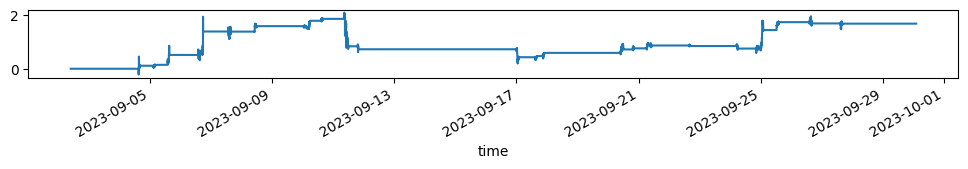

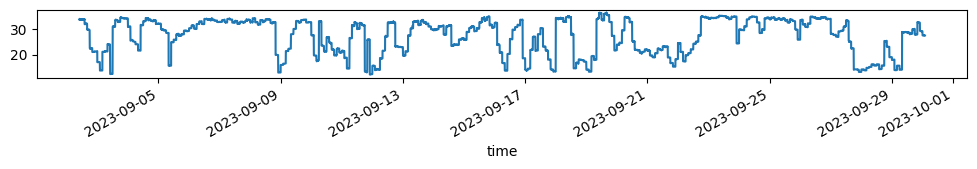

symbols: ['BNBUPUSDT', 'BNBUSDT']
87


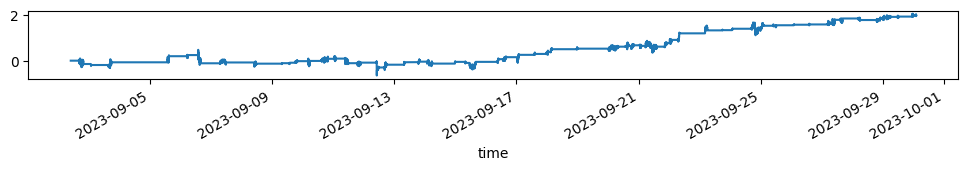

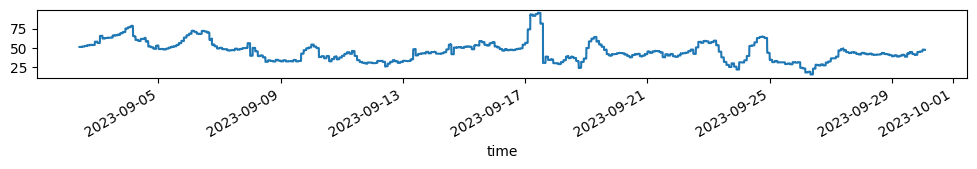

symbols: ['SSVUSDT', 'KP3RUSDT']
27


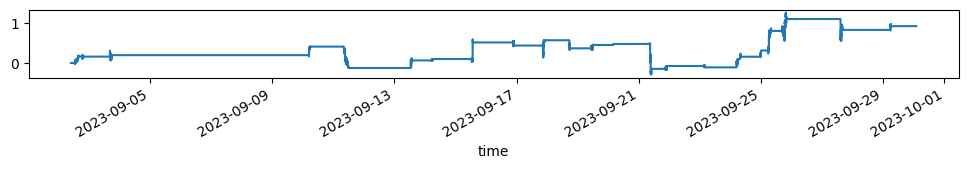

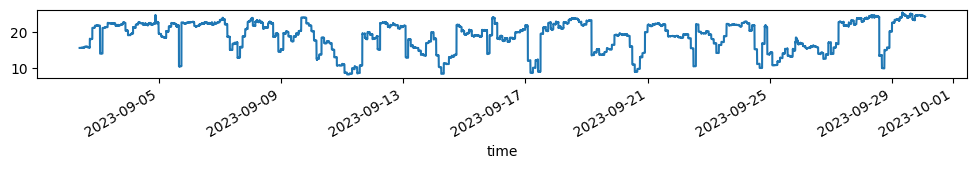

symbols: ['SOLUSDT', 'ILVUSDT']
53


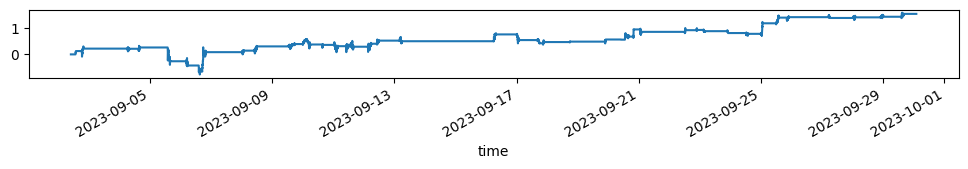

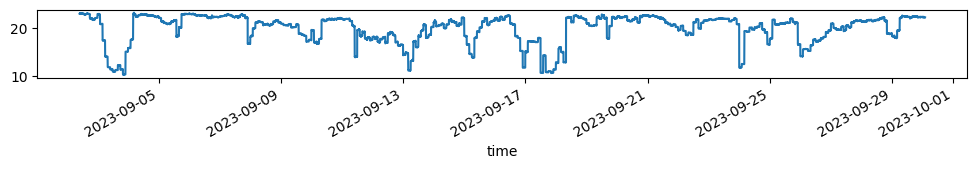

symbols: ['DASHUSDT', 'BIFIUSDT']
15


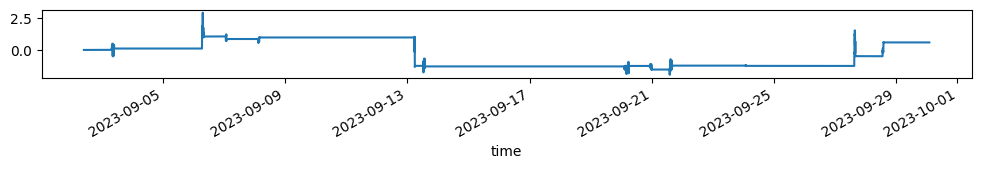

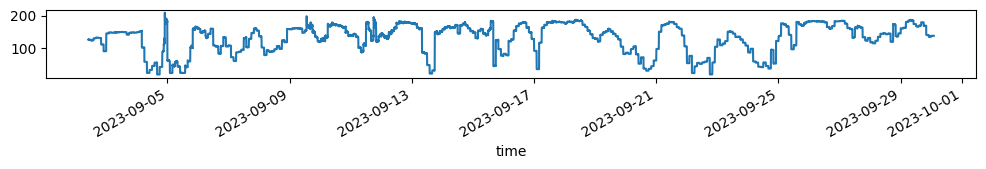

In [80]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 2.0)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=10, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)

visuialize_symbols_sets(symbols_sets, stat_arbitrage_trading_param, algo.research.simulation.MeanReversioMode.MINIMAL_PREDICTABILITY)

symbols: ['FARMUSDT', 'COMPUSDT']
68


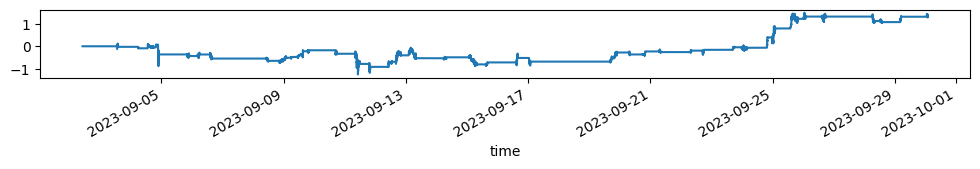

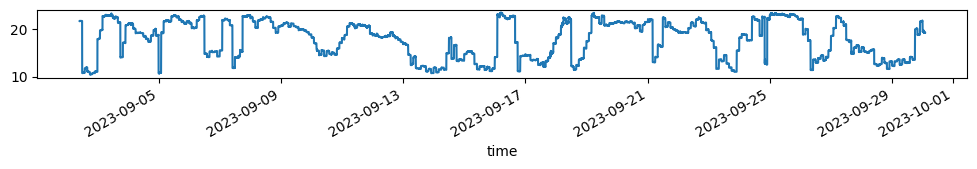

symbols: ['ZECUSDT', 'LTCUSDT']
58


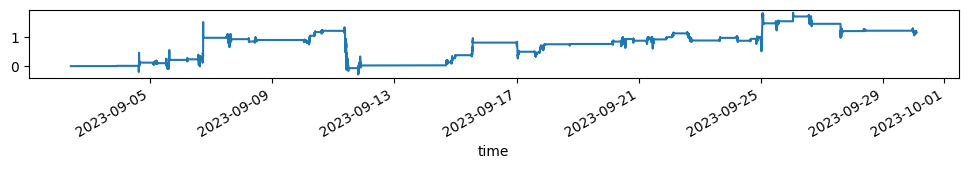

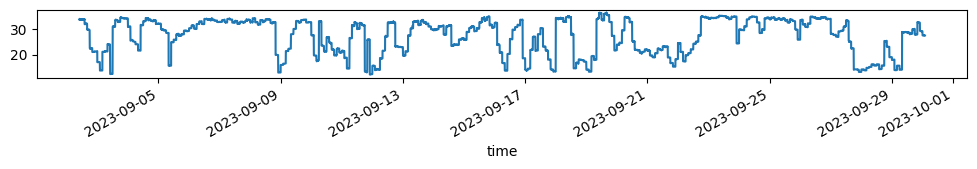

symbols: ['BNBUPUSDT', 'BNBUSDT']
150


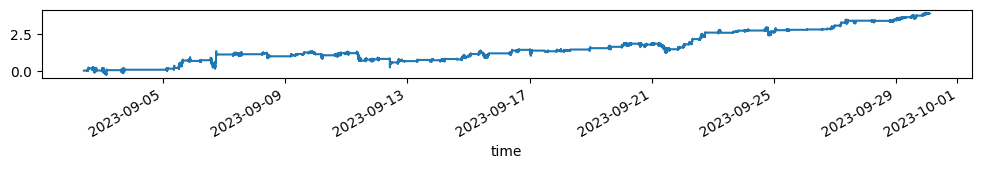

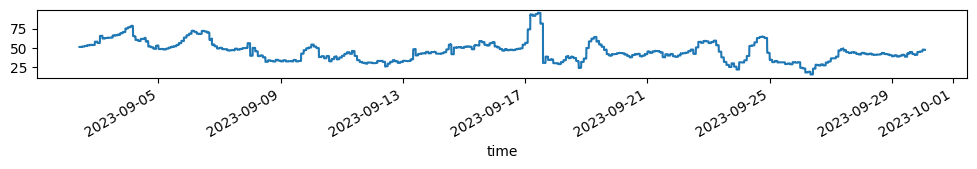

symbols: ['SSVUSDT', 'KP3RUSDT']
58


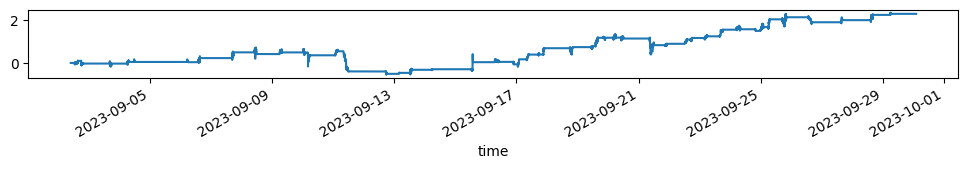

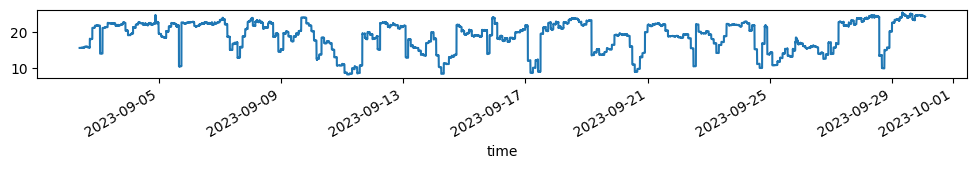

symbols: ['SOLUSDT', 'ILVUSDT']
92


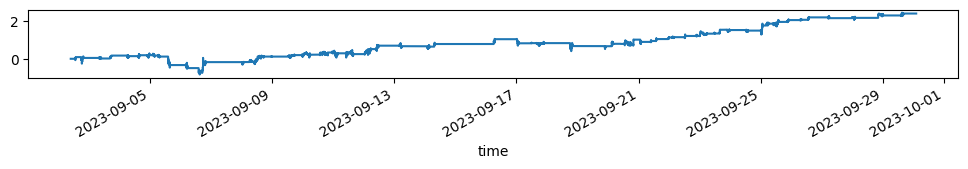

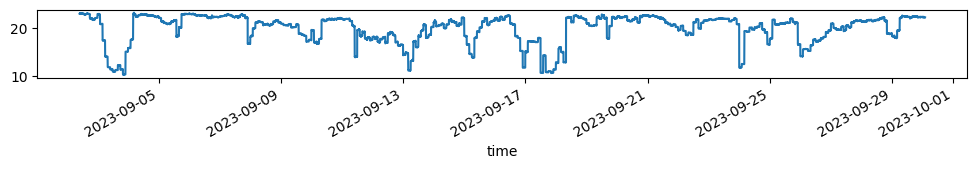

symbols: ['DASHUSDT', 'BIFIUSDT']
32


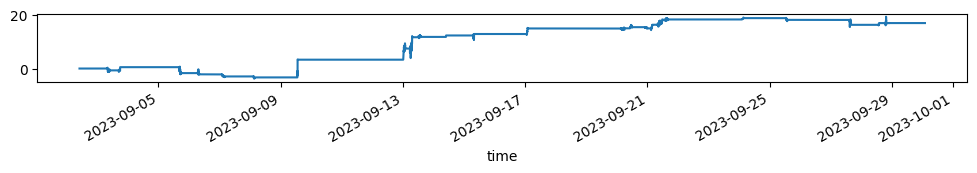

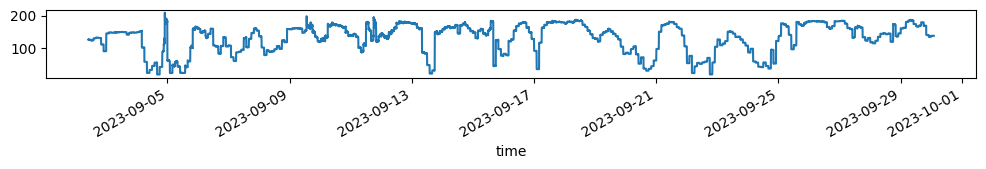

In [81]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 1.6)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=10, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)

visuialize_symbols_sets(symbols_sets, stat_arbitrage_trading_param, algo.research.simulation.MeanReversioMode.MINIMAL_PREDICTABILITY)

# Rolling-based Portfolio Construction Deepdive (minimal predictability)

In [786]:
df_prices = algo.data.read.df_binance_202309
symbols = symbols_sets[0]
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 1.6)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=1, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)
if_evecs = True

df_prices_train_sampled = df_prices[symbols].resample(f'{stat_arbitrage_trading_param.train_data_sample_period_minutes}min').last().dropna()
df_rolling_wgt, df_rolling_wgt_resampled = algo.research.simulation.get_minimal_predictability_wgts_values_transpose_rolling(
    df_prices_train_sampled, 
    window=stat_arbitrage_trading_param.fitting_window, 
    rebalance_period_minutes=stat_arbitrage_trading_param.rebalance_period_minutes, 
    order=0)

df_prices_bband = df_prices[symbols].resample(f'{stat_arbitrage_trading_param.bband_sample_period_minutes}min').last().dropna()
df_prices_trading = df_prices[symbols].resample(f'{stat_arbitrage_trading_param.trading_sample_period_minutes}min').last().dropna()

df_prices_list = []
head_buffer_length = stat_arbitrage_trading_param.bband_trading_param.bb_windows
wgt_resammpled = df_rolling_wgt_resampled.dropna()
for i, index_head in enumerate(wgt_resammpled.index):
    if i == len(wgt_resammpled.index)-1: continue

    #index_head_buffered = index_head - pd.Timedelta(minutes=head_buffer_length)
    index_head_buffered = index_head - pd.Timedelta(minutes=head_buffer_length * stat_arbitrage_trading_param.bband_sample_period_minutes)
    index_tail = wgt_resammpled.index[i+1]
    #df_prices_i = df_prices[(df_prices.index < index_tail) & (df_prices.index >= index_head_buffered)]
    df_prices_i_bband = df_prices_bband[(df_prices_bband.index < index_tail) & (df_prices_bband.index >= index_head_buffered)]
    df_prices_i_trading = df_prices_trading[(df_prices_trading.index < index_tail) & (df_prices_trading.index >= index_head)]
    df_prices_list.append((index_head_buffered, index_head, index_tail, df_prices_i_bband, df_prices_i_trading, wgt_resammpled.loc[index_head]))

values_list = []
for index_head_buffered, index_head, index_tail, df_prices_i_bband, df_prices_i_trading, wgt in df_prices_list:
    #print(f'df_prices_i:\n{df_prices_i_bband}')

    values_i = algo.statarbitrage.bband.add_features(df_prices_i_bband, df_prices_i_trading, wgt, stat_arbitrage_trading_param.bband_trading_param, rebalance_buffer=head_buffer_length)
    if len(values_i) > 0:
        values_i['value_0'] = values_i.value - values_i.value.iloc[0]
        if values_i.at[values_i.index[-1], 'in_position'] == 1:
            values_i.at[values_i.index[-1], 'position_changed'] = -1
    values_list.append(values_i)


In [787]:
values_concat = pd.concat(values_list)

In [788]:
len(values_concat[values_concat.position_changed == 1].dropna())

279

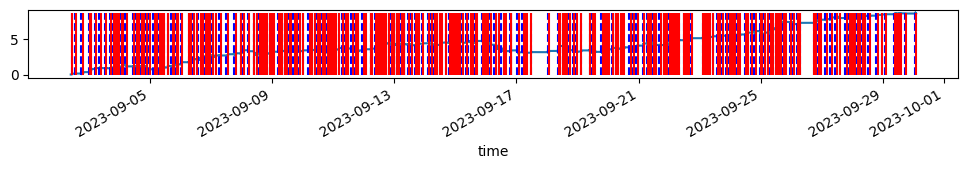

In [789]:
ax = values_concat.profit_raw.cumsum().plot(figsize=(12, 1))
ymin, ymax = 0, values_concat.profit_raw.cumsum().max()

#ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')
ax.vlines(x=list(values_concat[values_concat.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_concat[values_concat.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

<Axes: xlabel='time'>

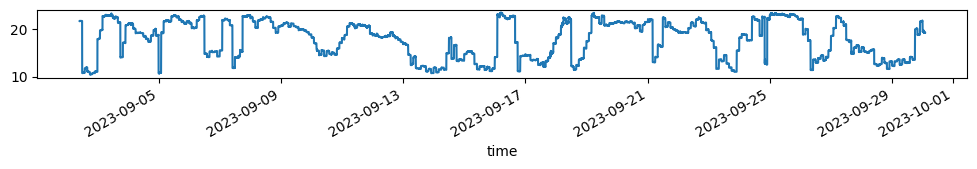

In [790]:
values_concat.mean_size.plot(figsize=(12, 1))

# Rolling-based Portfolio Construction (crossing stat)

symbols: ['FARMUSDT', 'COMPUSDT']
87


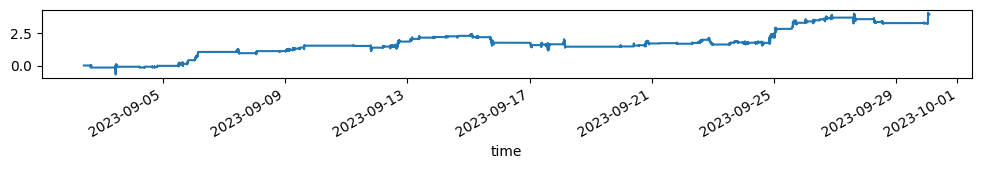

symbols: ['ZECUSDT', 'LTCUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


67


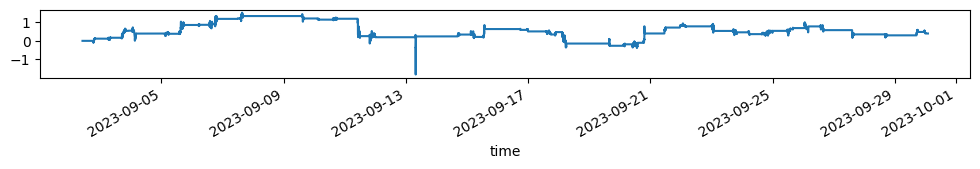

symbols: ['BNBUPUSDT', 'BNBUSDT']
165


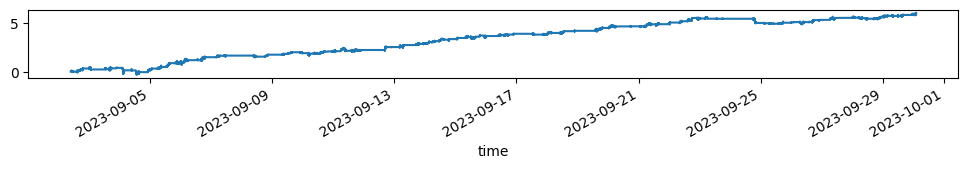

symbols: ['SSVUSDT', 'KP3RUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


60


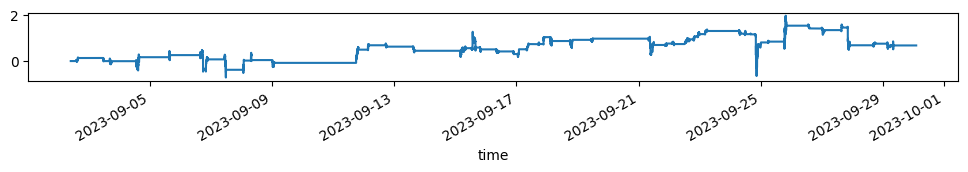

symbols: ['SOLUSDT', 'ILVUSDT']
98


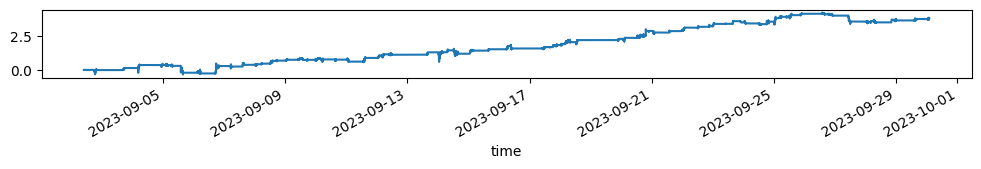

symbols: ['DASHUSDT', 'BIFIUSDT']
52


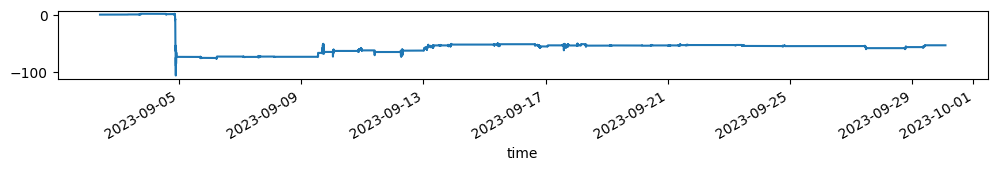

In [72]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 1.6)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=10, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)

visuialize_symbols_sets(symbols_sets, stat_arbitrage_trading_param, algo.research.simulation.MeanReversioMode.CROSSING_STAT)

In [613]:
i = 1
rolling_wgt = rolling_apply_ext(lambda *vsT: algo.mean_reversion.predictability.get_wgts_predictability_transpose(*vsT)[i][:,0], 120, *df_prices[symbols].values.T)

In [616]:
rolling_wgt.shape

(41757, 2)

In [668]:
cnt = 0
window, rebalance_period_minutes = 120, 60
indices, values = [], []
indices_sampled, values_sampled = [], []
for i, row in df_prices[symbols].iterrows():
    #print(f'row\n{row}\n{i}, {row["FARMUSDT"]}\n{dir(row)}\n{row[df_prices[symbols].columns[0]]}')
    indices.append(i)
    values.append(row.values)
    epoch_seconds = int(i.value / 10 ** 9)
    if epoch_seconds % (rebalance_period_minutes * 60) == 0:
        window_values = values[-window:]
        print(f'at rebalance {epoch_seconds}, values size: {len(values)}, window_values size: {len(window_values)}')
        if len(window_values) >= window:
            print(f'enough points for the window {window}')
            indices_sampled.append(i)
            values_sampled.append(row.values)
    cnt += 1
    if cnt > 400:
        break

at rebalance 1693540800, values size: 1, window_values size: 1
at rebalance 1693544400, values size: 61, window_values size: 61
at rebalance 1693548000, values size: 121, window_values size: 120
enough points for the window 120
at rebalance 1693551600, values size: 181, window_values size: 120
enough points for the window 120
at rebalance 1693555200, values size: 241, window_values size: 120
enough points for the window 120
at rebalance 1693558800, values size: 301, window_values size: 120
enough points for the window 120
at rebalance 1693562400, values size: 361, window_values size: 120
enough points for the window 120


In [669]:
pd.DataFrame(values_sampled, index=indices_sampled, columns=df_prices[symbols].columns)

symbol,FARMUSDT,COMPUSDT
2023-09-01 06:00:00,21.32,41.14
2023-09-01 07:00:00,21.16,40.82
2023-09-01 08:00:00,21.15,40.86
2023-09-01 09:00:00,21.09,41.01
2023-09-01 10:00:00,21.00,40.81


# Rolling-based Portfolio Construction Deepdive (crossing stat)

In [50]:
df_prices = algo.data.read.df_binance_202309
symbols = symbols_sets[0]
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 2.0)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=1, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)
if_evecs = True

df_prices_train_sampled = df_prices[symbols].resample(f'{stat_arbitrage_trading_param.train_data_sample_period_minutes}min').last().dropna()
df_rolling_wgt, df_rolling_wgt_resampled = algo.research.simulation.get_crossing_stat_wgts_values_transpose_rolling(
    df_prices_train_sampled, 
    window=stat_arbitrage_trading_param.fitting_window, 
    rebalance_period_minutes=stat_arbitrage_trading_param.rebalance_period_minutes, 
    order=0)

df_prices_bband = df_prices[symbols].resample(f'{stat_arbitrage_trading_param.bband_sample_period_minutes}min').last().dropna()
df_prices_trading = df_prices[symbols].resample(f'{stat_arbitrage_trading_param.trading_sample_period_minutes}min').last().dropna()

df_prices_list = []
head_buffer_length = stat_arbitrage_trading_param.bband_trading_param.bb_windows
wgt_resammpled = df_rolling_wgt_resampled.dropna()
for i, index_head in enumerate(wgt_resammpled.index):
    if i == len(wgt_resammpled.index)-1: continue

    #index_head_buffered = index_head - pd.Timedelta(minutes=head_buffer_length)
    index_head_buffered = index_head - pd.Timedelta(minutes=head_buffer_length * stat_arbitrage_trading_param.bband_sample_period_minutes)
    index_tail = wgt_resammpled.index[i+1]
    #df_prices_i = df_prices[(df_prices.index < index_tail) & (df_prices.index >= index_head_buffered)]
    df_prices_i_bband = df_prices_bband[(df_prices_bband.index < index_tail) & (df_prices_bband.index >= index_head_buffered)]
    df_prices_i_trading = df_prices_trading[(df_prices_trading.index < index_tail) & (df_prices_trading.index >= index_head)]
    df_prices_list.append((index_head_buffered, index_head, index_tail, df_prices_i_bband, df_prices_i_trading, wgt_resammpled.loc[index_head]))

values_list = []
for index_head_buffered, index_head, index_tail, df_prices_i_bband, df_prices_i_trading, wgt in df_prices_list:
    #print(f'df_prices_i:\n{df_prices_i_bband}')

    values_i = algo.statarbitrage.bband.add_features(df_prices_i_bband, df_prices_i_trading, wgt, stat_arbitrage_trading_param.bband_trading_param, rebalance_buffer=head_buffer_length)
    if len(values_i) > 0:
        values_i['value_0'] = values_i.value - values_i.value.iloc[0]
        if values_i.at[values_i.index[-1], 'in_position'] == 1:
            values_i.at[values_i.index[-1], 'position_changed'] = -1
    values_list.append(values_i)


KeyboardInterrupt: 

In [ ]:
values_concat = pd.concat(values_list)
len(values_concat[values_concat.position_changed == 1].dropna())

In [798]:
len(values_concat[values_concat.position_changed == 1].dropna())

179

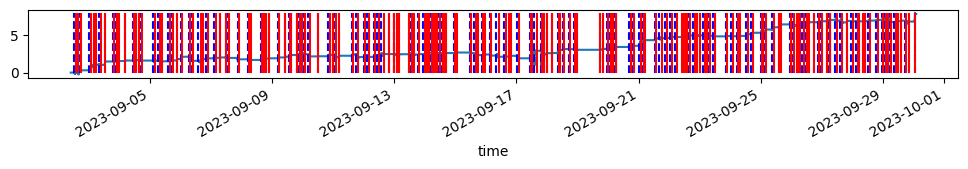

In [799]:
ax = values_concat.profit_raw.cumsum().plot(figsize=(12, 1))
ymin, ymax = 0, values_concat.profit_raw.cumsum().max()

#ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')
ax.vlines(x=list(values_concat[values_concat.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_concat[values_concat.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

<Axes: xlabel='time'>

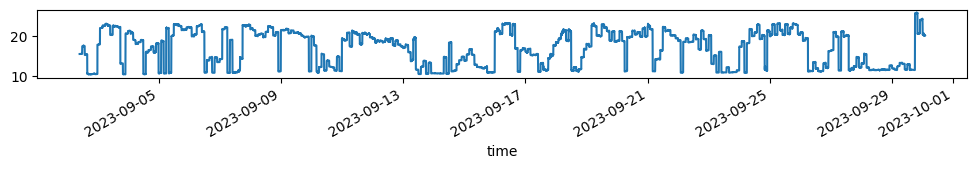

In [800]:
values_concat.mean_size.plot(figsize=(12, 1))

# Rolling-based Portfolio Construction (combination)

symbols: ['FARMUSDT', 'COMPUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


74


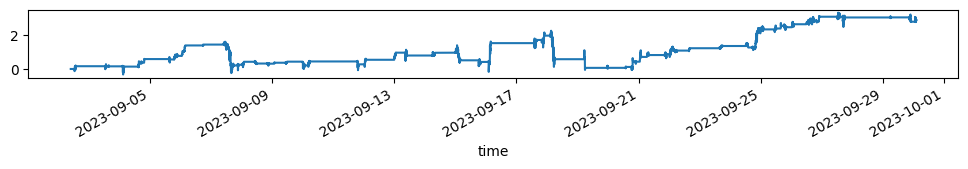

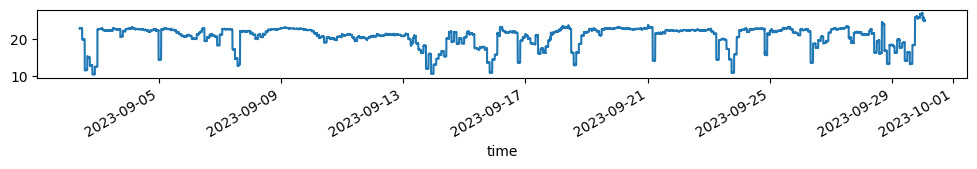

symbols: ['ZECUSDT', 'LTCUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


59


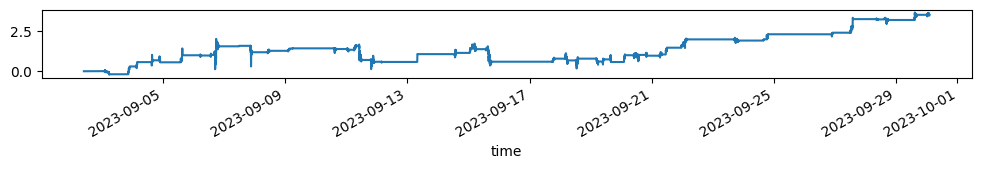

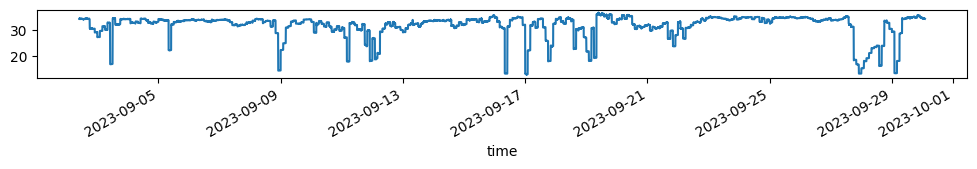

symbols: ['BNBUPUSDT', 'BNBUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


71


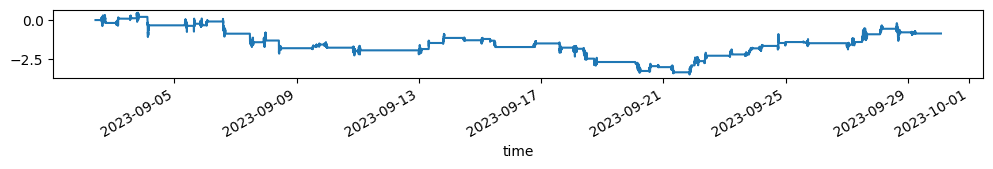

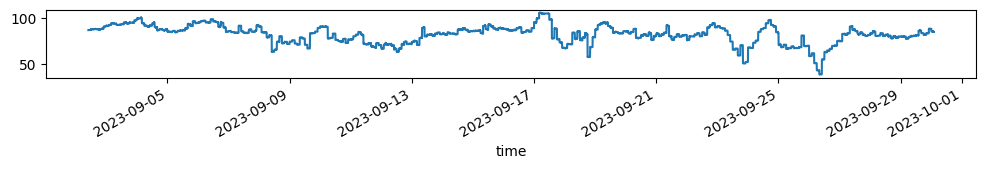

symbols: ['SSVUSDT', 'KP3RUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


64


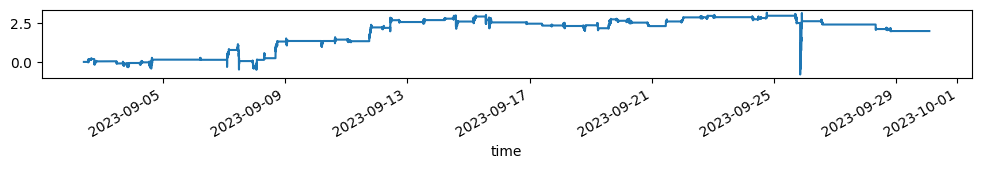

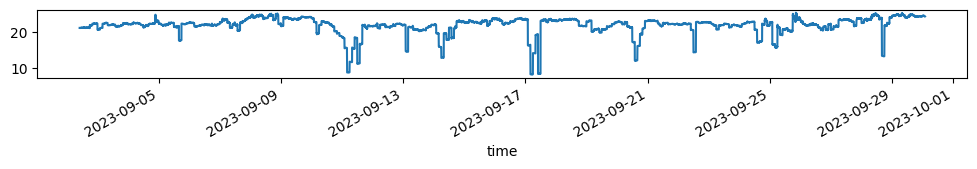

symbols: ['SOLUSDT', 'ILVUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


73


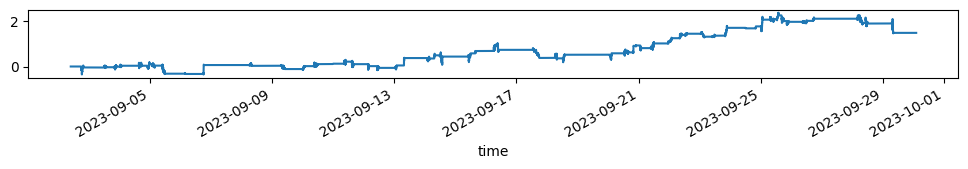

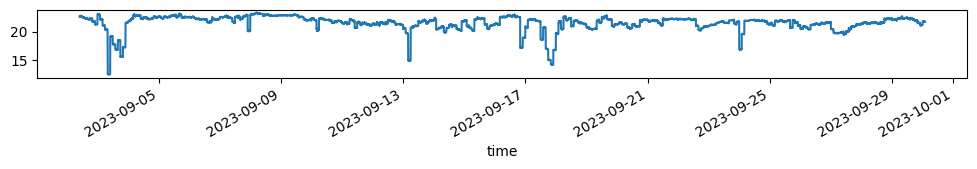

symbols: ['DASHUSDT', 'BIFIUSDT']
63


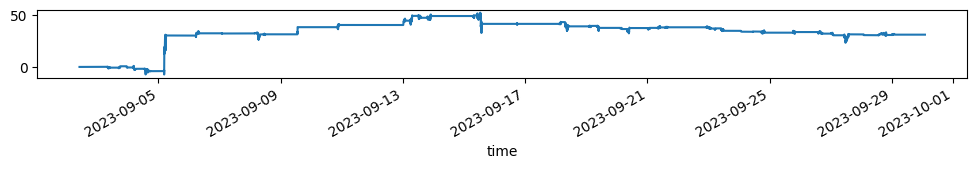

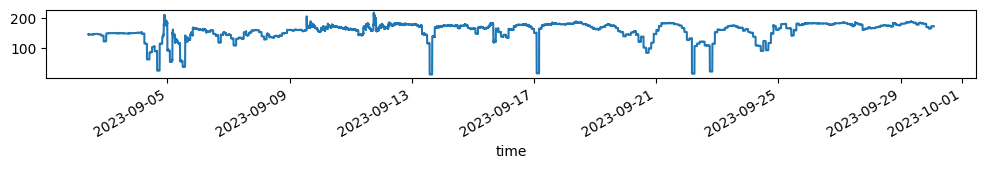

In [82]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 1.6)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=10, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)

visuialize_symbols_sets(symbols_sets, stat_arbitrage_trading_param, algo.research.simulation.MeanReversioMode.COMBINATION)

symbols: ['FARMUSDT', 'COMPUSDT']
64


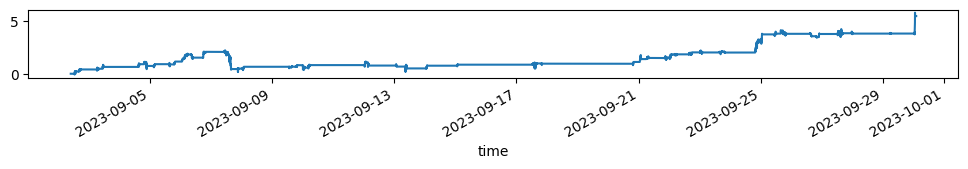

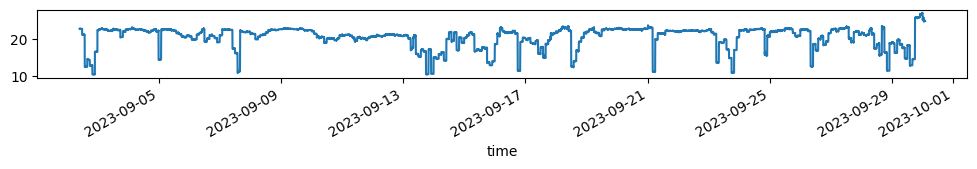

symbols: ['ZECUSDT', 'LTCUSDT']
59


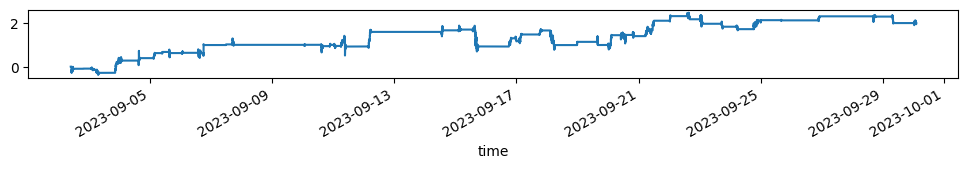

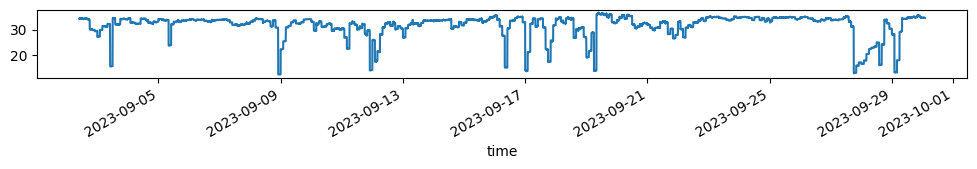

symbols: ['BNBUPUSDT', 'BNBUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


82


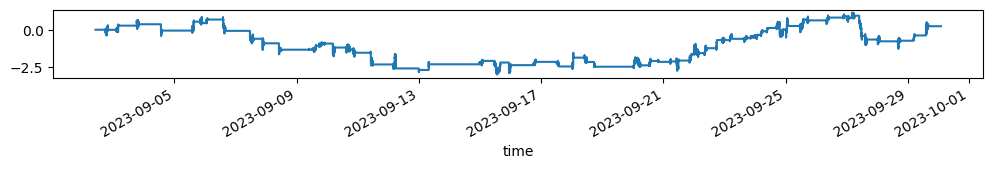

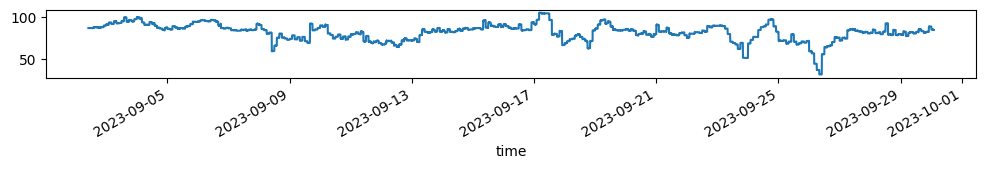

symbols: ['SSVUSDT', 'KP3RUSDT']
65


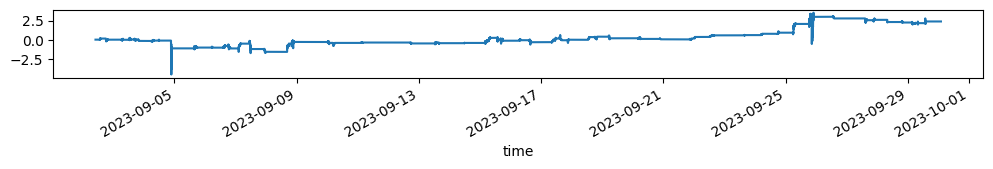

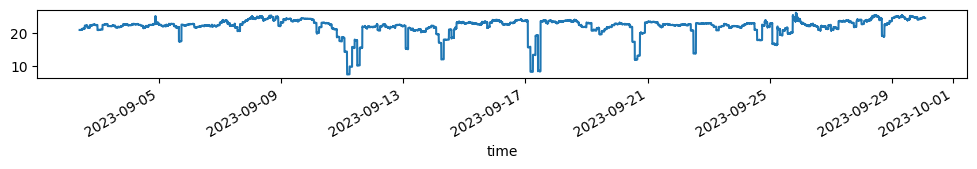

symbols: ['SOLUSDT', 'ILVUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


70


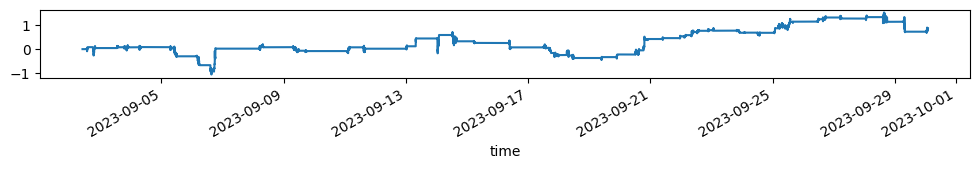

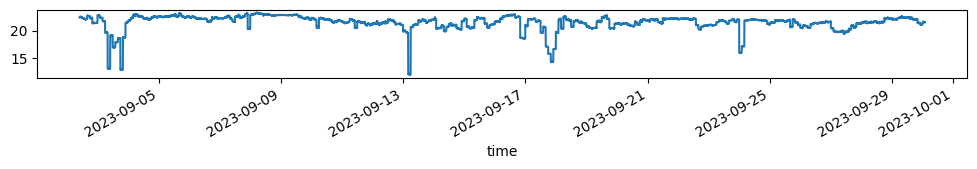

symbols: ['DASHUSDT', 'BIFIUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


76


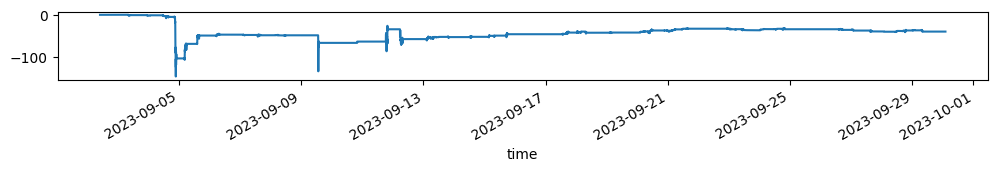

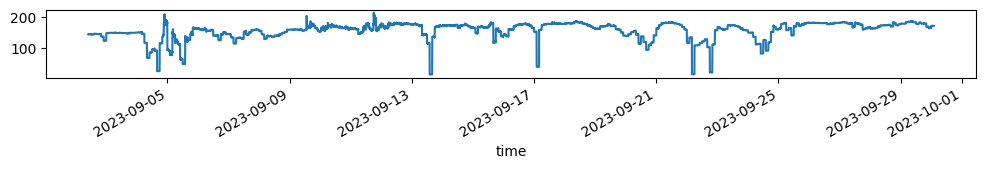

In [84]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 1.6)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=10, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)

visuialize_symbols_sets(symbols_sets, stat_arbitrage_trading_param, algo.research.simulation.MeanReversioMode.COMBINATION)

symbols: ['FARMUSDT', 'COMPUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


64


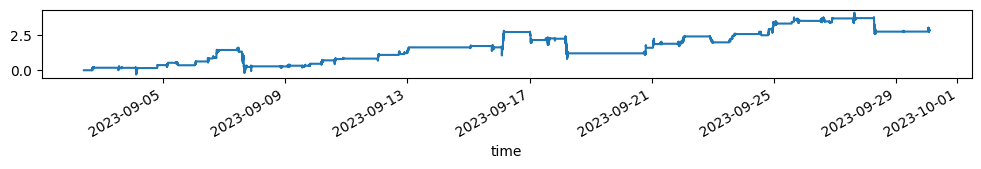

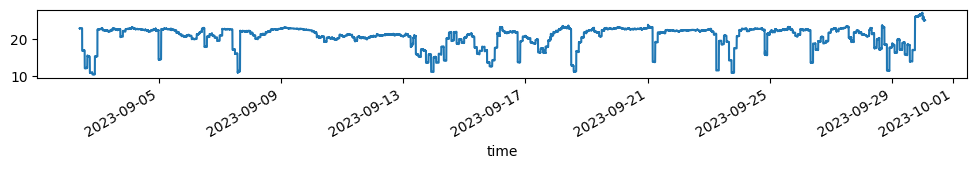

symbols: ['ZECUSDT', 'LTCUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


51


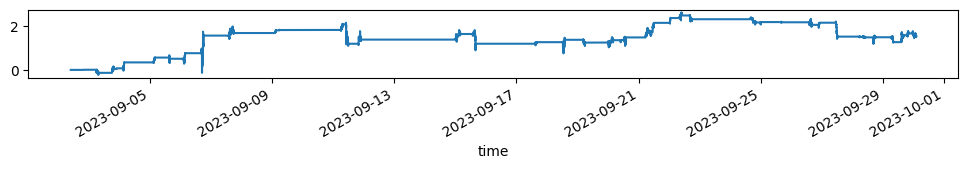

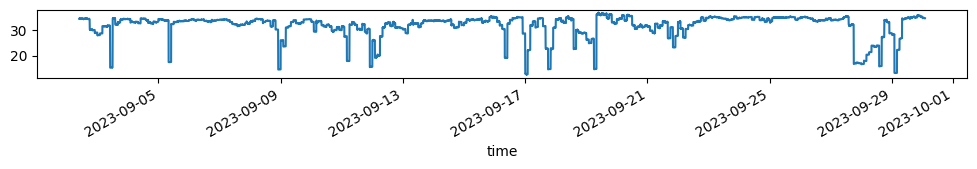

symbols: ['BNBUPUSDT', 'BNBUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


89


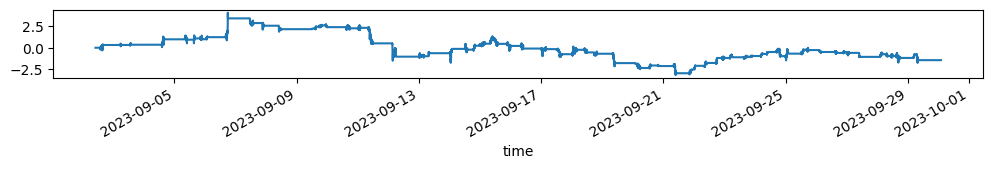

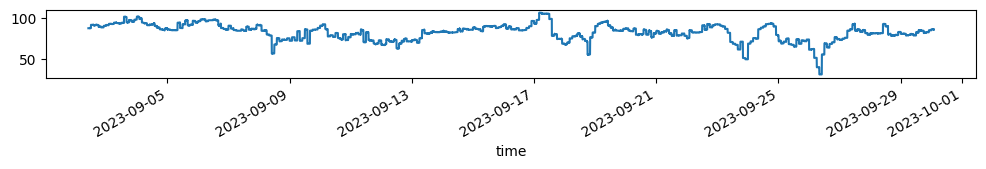

symbols: ['SSVUSDT', 'KP3RUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


71


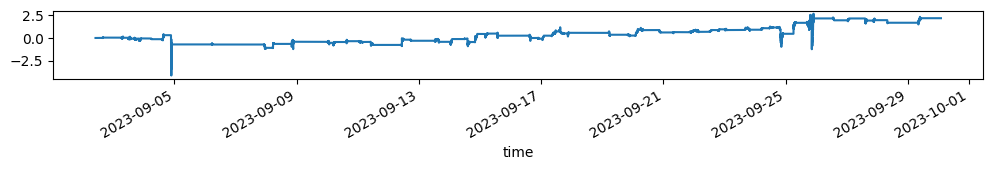

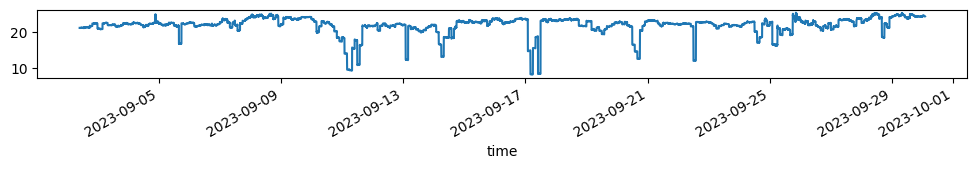

symbols: ['SOLUSDT', 'ILVUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


74


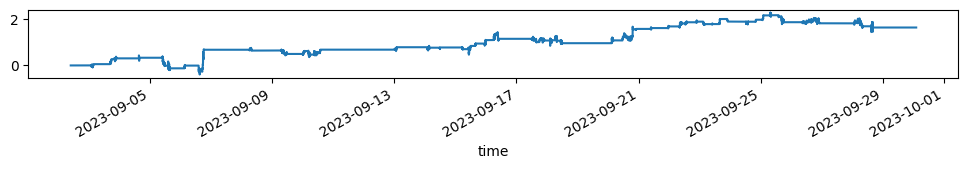

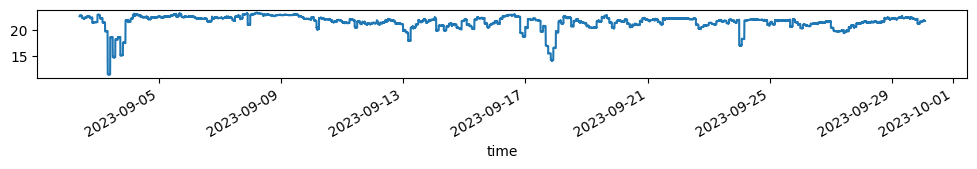

symbols: ['DASHUSDT', 'BIFIUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


67


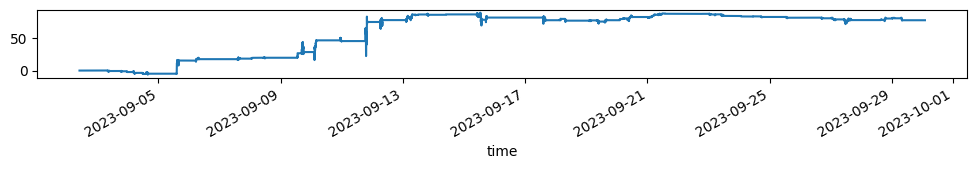

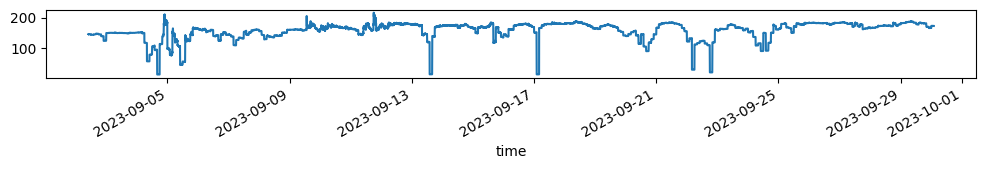

In [85]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 1.6)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=10, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)

visuialize_symbols_sets(symbols_sets, stat_arbitrage_trading_param, algo.research.simulation.MeanReversioMode.COMBINATION)

# Rolling-based Portfolio Construction Deepdive (crossing stat)

In [56]:
df_prices = algo.data.read.df_binance_202309
symbols = symbols_sets[0]
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 1.6)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=10, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)
if_evecs = True

df_prices_train_sampled = df_prices[symbols].resample(f'{stat_arbitrage_trading_param.train_data_sample_period_minutes}min').last().dropna()
df_rolling_wgt, df_rolling_wgt_resampled = algo.research.simulation.get_combination_wgts_values_transpose_rolling(
    df_prices_train_sampled, 
    window=stat_arbitrage_trading_param.fitting_window, 
    rebalance_period_minutes=stat_arbitrage_trading_param.rebalance_period_minutes, 
    order=0)

df_prices_bband = df_prices[symbols].resample(f'{stat_arbitrage_trading_param.bband_sample_period_minutes}min').last().dropna()
df_prices_trading = df_prices[symbols].resample(f'{stat_arbitrage_trading_param.trading_sample_period_minutes}min').last().dropna()

df_prices_list = []
head_buffer_length = stat_arbitrage_trading_param.bband_trading_param.bb_windows
wgt_resammpled = df_rolling_wgt_resampled.dropna()
for i, index_head in enumerate(wgt_resammpled.index):
    if i == len(wgt_resammpled.index)-1: continue

    #index_head_buffered = index_head - pd.Timedelta(minutes=head_buffer_length)
    index_head_buffered = index_head - pd.Timedelta(minutes=head_buffer_length * stat_arbitrage_trading_param.bband_sample_period_minutes)
    index_tail = wgt_resammpled.index[i+1]
    #df_prices_i = df_prices[(df_prices.index < index_tail) & (df_prices.index >= index_head_buffered)]
    df_prices_i_bband = df_prices_bband[(df_prices_bband.index < index_tail) & (df_prices_bband.index >= index_head_buffered)]
    df_prices_i_trading = df_prices_trading[(df_prices_trading.index < index_tail) & (df_prices_trading.index >= index_head)]
    df_prices_list.append((index_head_buffered, index_head, index_tail, df_prices_i_bband, df_prices_i_trading, wgt_resammpled.loc[index_head]))

values_list = []
for index_head_buffered, index_head, index_tail, df_prices_i_bband, df_prices_i_trading, wgt in df_prices_list:
    #print(f'df_prices_i:\n{df_prices_i_bband}')

    values_i = algo.statarbitrage.bband.add_features(df_prices_i_bband, df_prices_i_trading, wgt, stat_arbitrage_trading_param.bband_trading_param, rebalance_buffer=head_buffer_length)
    if len(values_i) > 0:
        values_i['value_0'] = values_i.value - values_i.value.iloc[0]
        if values_i.at[values_i.index[-1], 'in_position'] == 1:
            values_i.at[values_i.index[-1], 'position_changed'] = -1
    values_list.append(values_i)

values_concat = pd.concat(values_list)
len(values_concat[values_concat.position_changed == 1].dropna())

/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


51

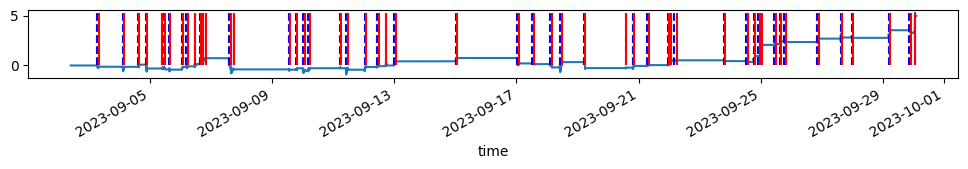

In [57]:
ax = values_concat.profit_raw.cumsum().plot(figsize=(12, 1))
ymin, ymax = 0, values_concat.profit_raw.cumsum().max()

#ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')
ax.vlines(x=list(values_concat[values_concat.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_concat[values_concat.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

symbols: ['FARMUSDT', 'COMPUSDT']


/home/junlim/projects/mean_reversal/algo/mean_reversion/optimization.py:11: RuntimeWarning: invalid value encountered in divide
  rs = rs / math.sqrt(np.sum(rs ** 2))


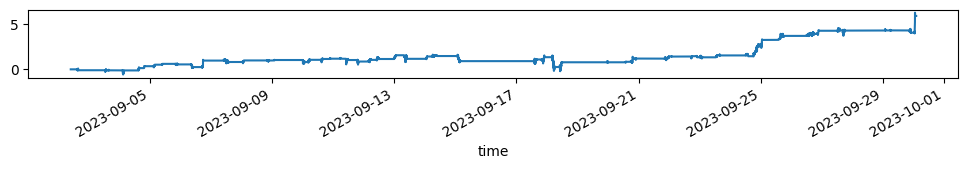

In [43]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 1.6)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=10, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)
for symbols in symbols_sets[:1]:
    print(f'symbols: {symbols}')
    values_list = algo.research.simulation.get_trading_result(algo.data.read.df_binance_202309, symbols, stat_arbitrage_trading_param, algo.research.simulation.MeanReversioMode.COMBINATION)
    values_concat = pd.concat(values_list)
    ax = values_concat.profit_raw.cumsum().plot(figsize=(12, 1))
    ymin, ymax = 0, values_concat.profit_raw.cumsum().max()

    #ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')
    #ax.vlines(x=list(values_concat[values_concat.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
    #ax.vlines(x=list(values_concat[values_concat.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

    plt.show()

# etc

<Axes: xlabel='time'>

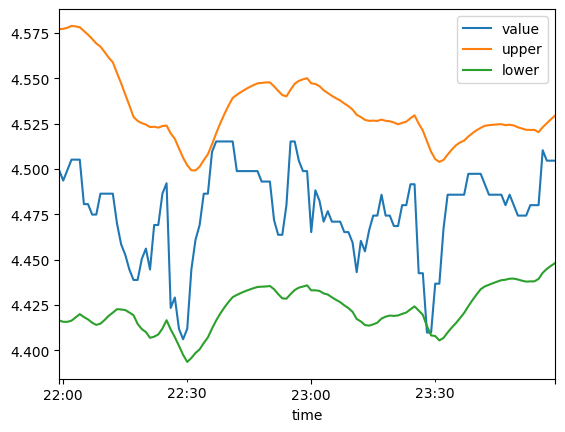

In [938]:
values_list[93][['value', 'upper', 'lower']].plot()

<Axes: xlabel='time'>

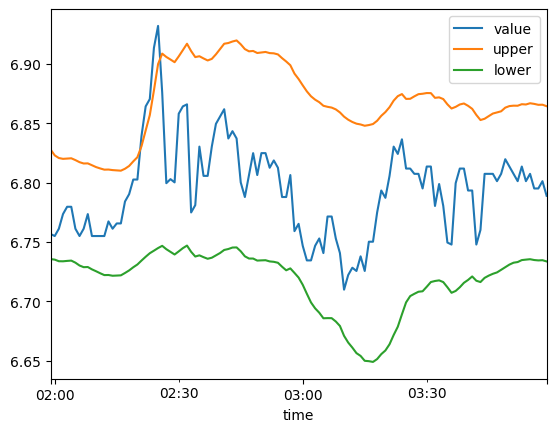

In [940]:
values_list[95][['value', 'upper', 'lower']].plot()

<Axes: xlabel='time'>

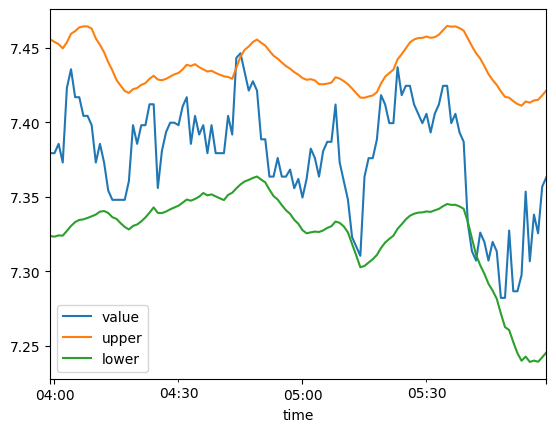

In [941]:
values_list[96][['value', 'upper', 'lower']].plot()

<Axes: xlabel='time'>

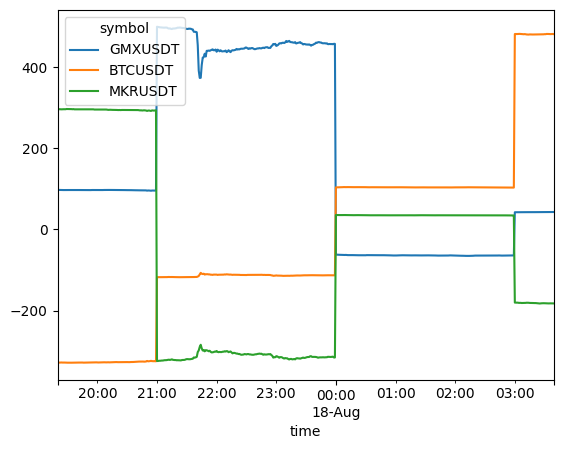

In [683]:
(df_prices * df_rolling_wgt_resampled.resample('1min').first().ffill()).iloc[17000:17500].plot()

<Axes: xlabel='time'>

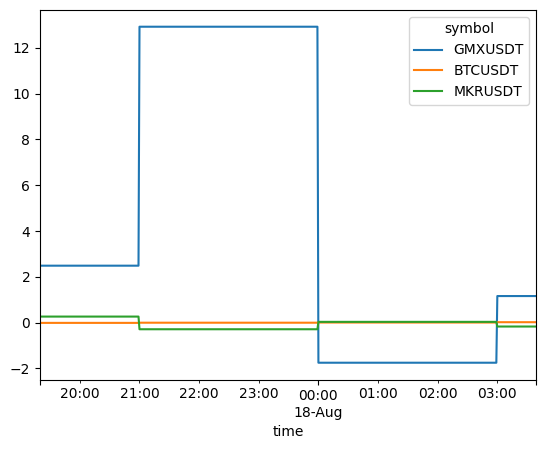

In [684]:
df_rolling_wgt_resampled.resample('1min').first().ffill().iloc[17000:17500].plot()

<Axes: xlabel='time'>

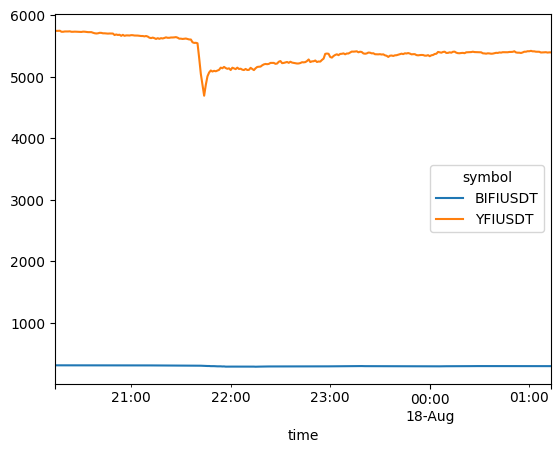

In [660]:
df_prices.iloc[10000:10300].plot()

<Axes: xlabel='time'>

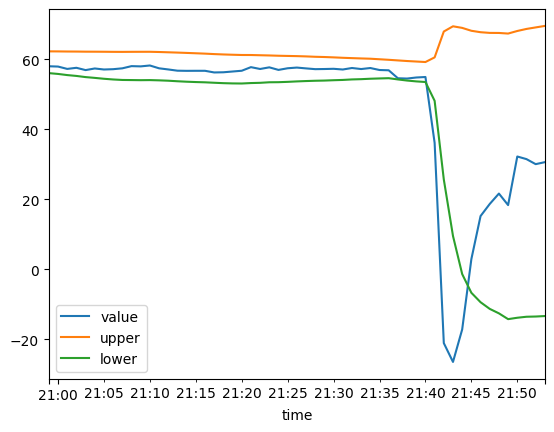

In [607]:
values_list[95].iloc[0:55][['value', 'upper', 'lower']].plot()

In [350]:
values_list[95].iloc[0:10]

,value,rebalanced,rebalance_age,upper,lower,value_prev,lower_crossed_upward,lower_crossed_downward,upper_crossed_upward,upper_crossed_downward,in_position,position_changed,mean_size,position_size,profit_raw,profit,value_0
time,,,,,,,,,,,,,,,,,
2023-08-17 20:59:00,197.678883,0,60,199.556750,196.115248,198.096973,0,0,0,0,0,NaN,11484.300135,0.000000,NaN,NaN,0.000000
2023-08-17 21:00:00,196.827749,0,61,199.455753,196.014269,197.678883,0,0,0,0,0,0.0,11495.700049,0.000000,-0.000000,-0.000000,-0.851134
2023-08-17 21:01:00,195.689635,0,62,199.316355,195.743995,196.827749,0,1,0,0,0,0.0,11498.022285,0.000000,-0.000000,-0.000000,-1.989248
2023-08-17 21:02:00,196.686304,0,63,199.240919,195.650436,195.689635,1,0,0,0,1,1.0,11498.424305,0.000000,0.000000,0.000000,-0.992578
2023-08-17 21:03:00,194.137323,0,64,199.068686,195.160217,196.686304,0,1,0,0,1,0.0,11486.195017,11486.195017,-2.548981,-0.012960,-3.541560
2023-08-17 21:04:00,195.008098,0,65,198.947165,194.860020,194.137323,1,0,0,0,1,0.0,11482.347647,11486.195017,0.870775,0.004485,-2.670785
2023-08-17 21:05:00,195.085826,0,66,198.806383,194.636901,195.008098,0,0,0,0,1,0.0,11488.625791,11486.195017,0.077729,0.000399,-2.593057
2023-08-17 21:06:00,195.145393,0,67,198.694808,194.432955,195.085826,0,0,0,0,1,0.0,11480.122225,11486.195017,0.059566,0.000305,-2.533490
2023-08-17 21:07:00,194.896758,0,68,198.566908,194.227172,195.145393,0,0,0,0,1,0.0,11474.693686,11486.195017,-0.248634,-0.001274,-2.782124


In [344]:
values_list[95].iloc[39:48]

,value,rebalanced,rebalance_age,upper,lower,value_prev,lower_crossed_upward,lower_crossed_downward,upper_crossed_upward,upper_crossed_downward,in_position,position_changed,mean_size,position_size,profit_raw,profit,value_0
time,,,,,,,,,,,,,,,,,
2023-08-17 21:38:00,185.318683,0,99,196.761479,181.625366,185.412153,0,0,0,0,1,0.0,11437.465204,11486.195017,-0.093470,-0.000504,-12.360199
2023-08-17 21:39:00,187.181548,0,100,196.664258,181.320201,185.318683,0,0,0,0,1,0.0,11440.021289,11486.195017,1.862865,0.010052,-10.497335
2023-08-17 21:40:00,187.683243,0,101,196.641494,181.081162,187.181548,0,0,0,0,1,0.0,11438.519034,11486.195017,0.501695,0.002680,-9.995640
2023-08-17 21:41:00,185.229852,0,102,196.515411,180.480934,187.683243,0,0,0,0,1,0.0,11345.714662,11486.195017,-2.453391,-0.013072,-12.449031
2023-08-17 21:42:00,144.899558,0,103,198.955994,169.320459,185.229852,0,1,0,0,1,0.0,11190.363888,11486.195017,-40.330293,-0.217731,-52.779324
2023-08-17 21:43:00,225.484735,0,104,205.280144,171.265755,144.899558,1,0,1,0,1,0.0,10819.834398,11486.195017,80.585177,0.556145,27.805852
2023-08-17 21:44:00,301.159549,0,105,232.227344,166.896229,225.484735,0,0,0,0,1,0.0,10480.866355,11486.195017,75.674814,0.335609,103.480666
2023-08-17 21:45:00,268.614421,0,106,244.281056,168.653239,301.159549,0,0,0,0,1,0.0,10683.840744,11486.195017,-32.545128,-0.108066,70.935539
2023-08-17 21:46:00,242.516953,0,107,249.743334,170.401014,268.614421,0,0,0,1,0,-1.0,10758.113655,11486.195017,-26.097468,-0.097156,44.838070


In [340]:
df_prices.iloc[10085:10100]

symbol,BTCUSDT,BTCBUSD,BNBBUSD
time,,,
2023-08-17 21:38:00,27573.68,27533.57,221.8
2023-08-17 21:39:00,27578.74,27541.68,221.9
2023-08-17 21:40:00,27574.80,27540.52,221.6
2023-08-17 21:41:00,27351.64,27311.28,220.5
2023-08-17 21:42:00,27000.00,26874.42,219.8
2023-08-17 21:43:00,26054.32,26063.61,216.8
2023-08-17 21:44:00,25188.01,25296.86,218.2
2023-08-17 21:45:00,25699.03,25777.76,216.5
2023-08-17 21:46:00,25894.61,25930.44,216.7


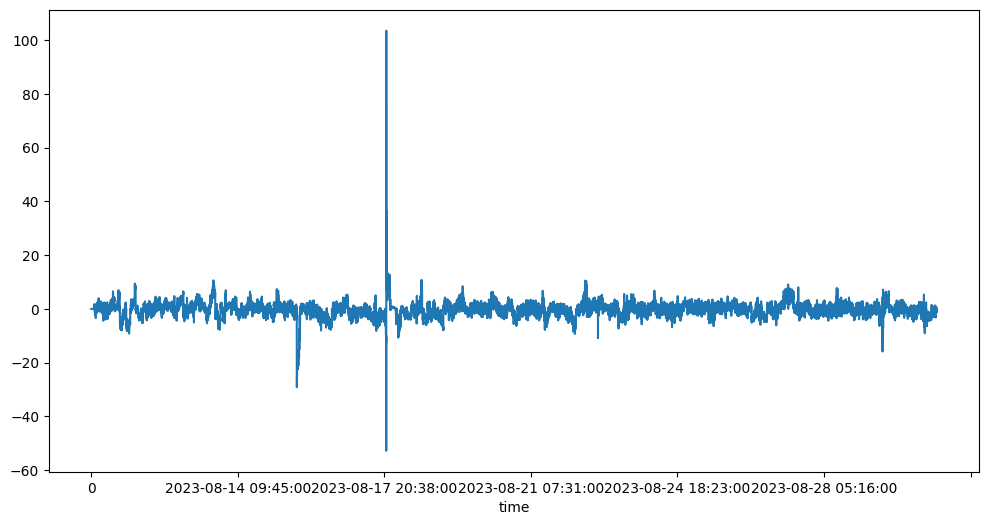

In [413]:
values_concat = pd.concat(values_list)
ax = values_concat.value_0.plot(figsize=(12, 6))
ymin, ymax = values_concat.value_0.min(), values_concat.value_0.max()

#ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')

plt.show()

<Axes: xlabel='time'>

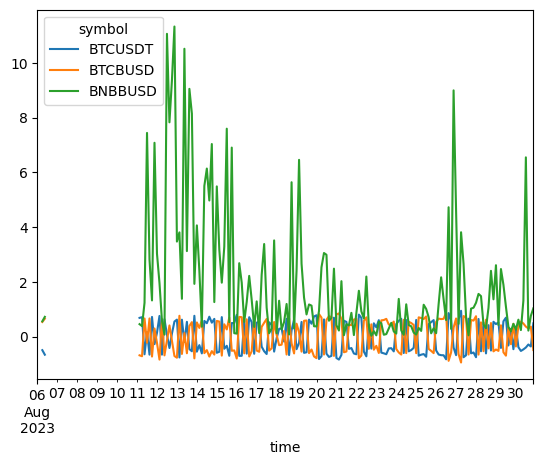

In [266]:
df_rolling_wgt_resampled.plot()

In [259]:
df_rolling_wgt_resampled.index

DatetimeIndex(['2023-08-06 00:00:00', '2023-08-06 03:00:00',
               '2023-08-06 06:00:00', '2023-08-06 09:00:00',
               '2023-08-06 12:00:00', '2023-08-06 15:00:00',
               '2023-08-06 18:00:00', '2023-08-06 21:00:00',
               '2023-08-07 00:00:00', '2023-08-07 03:00:00',
               ...
               '2023-08-29 18:00:00', '2023-08-29 21:00:00',
               '2023-08-30 00:00:00', '2023-08-30 03:00:00',
               '2023-08-30 06:00:00', '2023-08-30 09:00:00',
               '2023-08-30 12:00:00', '2023-08-30 15:00:00',
               '2023-08-30 18:00:00', '2023-08-30 21:00:00'],
              dtype='datetime64[ns]', name='time', length=200, freq='180T')

In [257]:
df_rolling_wgt_resampled

symbol,BTCUSDT,BTCBUSD,BNBBUSD
time,,,
2023-08-06 00:00:00,NaN,NaN,NaN
2023-08-06 03:00:00,NaN,NaN,NaN
2023-08-06 06:00:00,-0.498671,0.531318,0.555894
2023-08-06 09:00:00,-0.664215,0.653163,0.718548
2023-08-06 12:00:00,NaN,NaN,NaN
...,...,...,...
2023-08-30 09:00:00,-0.470847,0.475181,1.309584
2023-08-30 12:00:00,-0.401504,0.361844,6.547826
2023-08-30 15:00:00,-0.291655,0.295036,0.216342


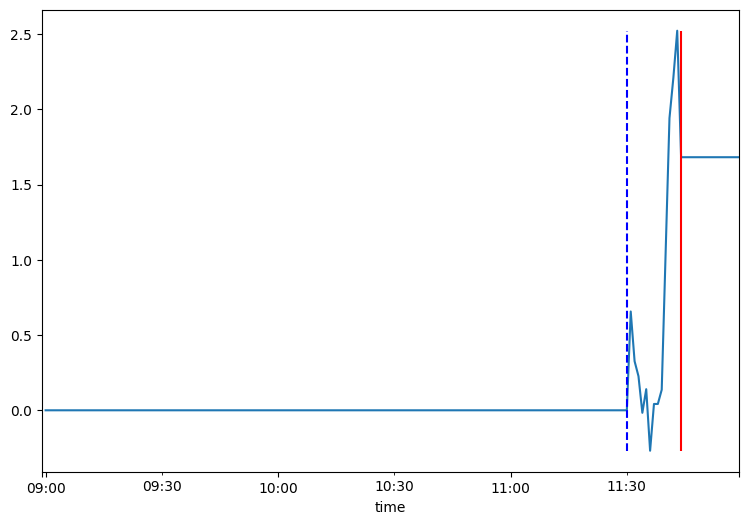

In [414]:
i = len(values_list) // 2
values_i = values_list[i]
ax = values_i.profit_raw.cumsum().plot(figsize=(9, 6))
ymin, ymax = values_i.profit_raw.cumsum().min(), values_i.profit_raw.cumsum().max()

ax.vlines(x=list(values_i[values_i.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_i[values_i.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

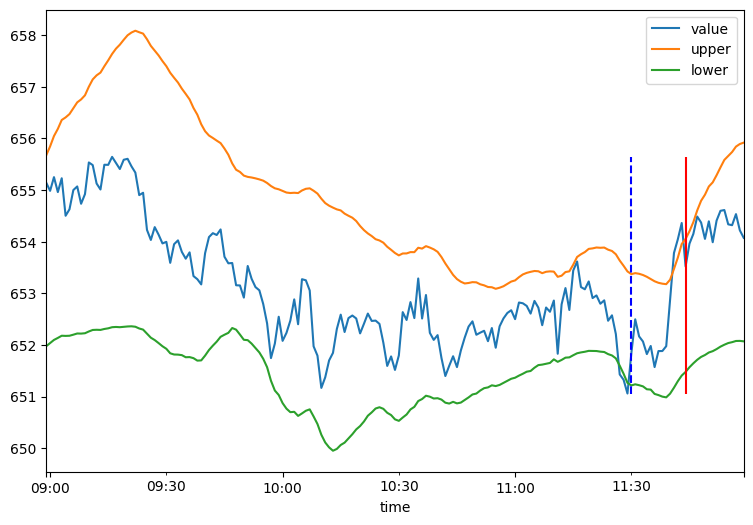

In [415]:
# plot dataframe; the index is a datetime index
#ax = values_rolling[['value', 'upper', 'lower']].plot(figsize=(9, 6))
ax = values_i[['value', 'upper', 'lower']].plot(figsize=(9, 6))
ymin, ymax = values_i.value.min(), values_i.value.max()

ax.vlines(x=list(values_i[values_i.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_i[values_i.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

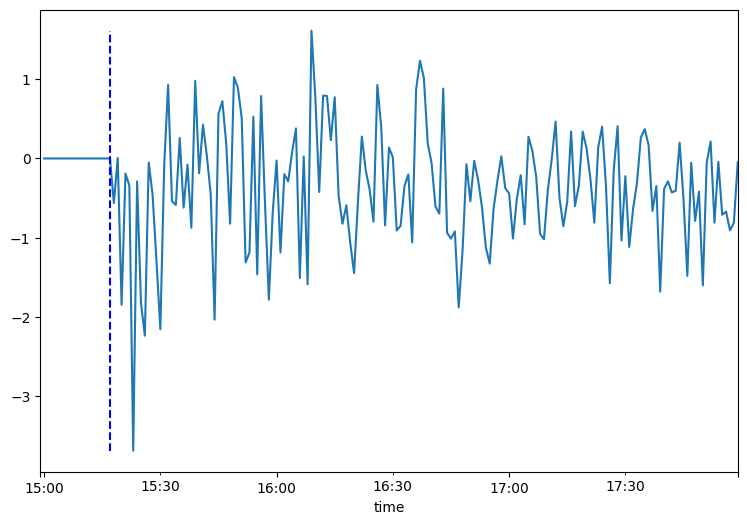

In [253]:
i = -2
values_i = values_list[i]
ax = values_i.profit_raw.cumsum().plot(figsize=(9, 6))
ymin, ymax = values_i.profit_raw.cumsum().min(), values_i.profit_raw.cumsum().max()

ax.vlines(x=list(values_i[values_i.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_i[values_i.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

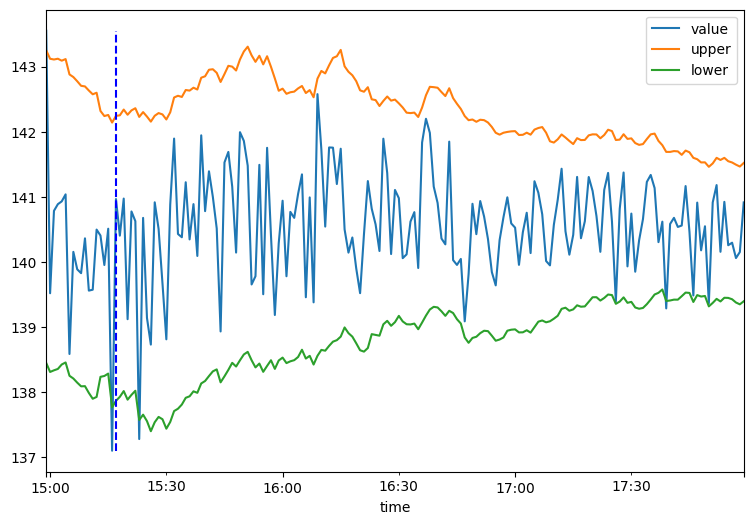

In [254]:
# plot dataframe; the index is a datetime index
#ax = values_rolling[['value', 'upper', 'lower']].plot(figsize=(9, 6))
ax = values_i[['value', 'upper', 'lower']].plot(figsize=(9, 6))
ymin, ymax = values_i.value.min(), values_i.value.max()

ax.vlines(x=list(values_i[values_i.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_i[values_i.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

<Axes: xlabel='time'>

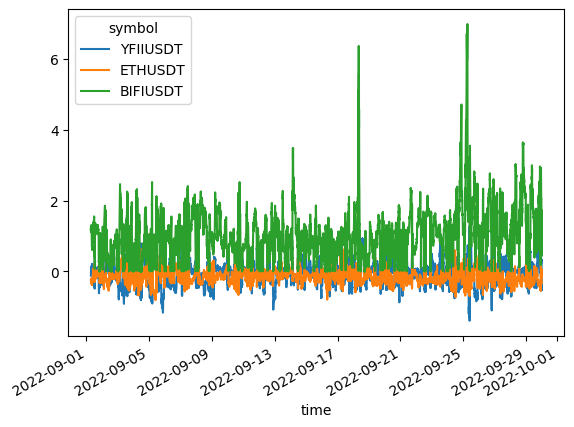

In [75]:
df_rolling_wgt.plot()

<Axes: xlabel='time'>

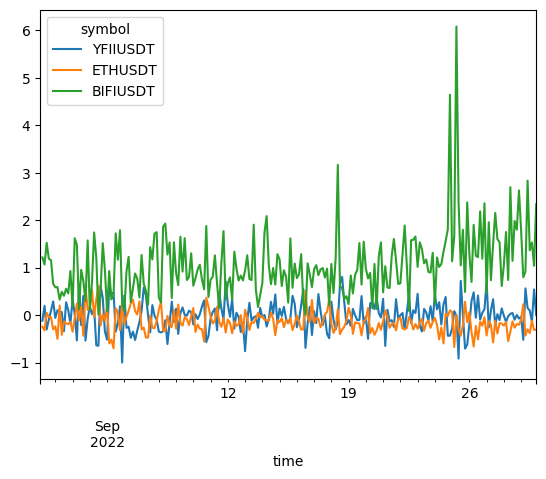

In [76]:
df_rolling_wgt_resampled.plot()